# Machine Learning - Logistic Regression and Evaluation of Classification Algorithm

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 1. Linear Regression / Hyperparameter / Model Evaluation

In [ ]:
# load data
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, header=None)

In [ ]:
df_setosa = df[df[4] == "Iris-setosa"]

In [ ]:
df_setosa = df_setosa.iloc[:, :4]
df_setosa = df_setosa.to_numpy()
X = df_setosa[:, :3]
X = np.insert(X, 0, 1, axis=1)
y = df_setosa[:, 3]

In [ ]:
def linear_function(theta, x):
  '''
  theta: w0, w1, ..., wn
  x: x0=1, x1, ..., xn
  '''
  return np.dot(theta, x)

In [ ]:
# define cost function
def cost_linear(theta, X, y):
  '''
  theta: w0, w1, ..., wn
  X: data
  y: predictor variable
  '''
  # m: number of data
  m = len(X)

  cost = 0
  for i in range(m):
    cost += np.power(linear_function(theta, X[i]) - y[i], 2)
  cost = cost * 1/m
  return cost

In [ ]:
def compute_jth_linear_gradient(theta, j, X, y):
  '''
  theta: w0, w1, ..., wn
  j: jth feature
  X: data
  y: predictor variable
  '''
  # m: number of data
  m = len(X)

  dJ_dw = 0
  for i in range(m):
    dJ_dw += (linear_function(theta, X[i]) - y[i]) * X[i][j]
  dJ_dw = dJ_dw * (2/m)

  return dJ_dw

In [ ]:
def linear_gradient_descent(X, y, alpha): # alpha : learning rate
  '''
  X: data
  y: predictor variable
  '''
  m = len(X)
  n = X.shape[1]

  # hyper parameter
  epsilon = 10**-4
  # alpha = 10**-2

  # cost J
  J = [] # list

  # set the seed
  np.random.seed(123)

  # initialize theta
  theta = np.random.rand(n)

  iter = 0
  while True:

    J.append(cost_linear(theta, X, y)) # J : cost 가지고 있는 ...

    # update
    for j in range(n):
      theta[j] = theta[j] - alpha * compute_jth_linear_gradient(theta, j, X, y)

    # convergence check
    if iter > 0:
      if np.abs(J[iter] - J[iter - 1]) < epsilon:
        break

    # if not converge
    if iter == 200:
      break

    iter += 1


  return theta, J


# 1.1 Changing the value of alpha (or learning rate) affects convergence

In [ ]:
# when alpha = 0.01
theta, J = linear_gradient_descent(X, y, alpha=10**-2)

In [ ]:
J

[12.063743929418541,
 1.5444216269421611,
 0.2121277177666805,
 0.04340187025628166,
 0.022033507483920755,
 0.01932251736238185,
 0.018972235483706953,
 0.018920104213165305]

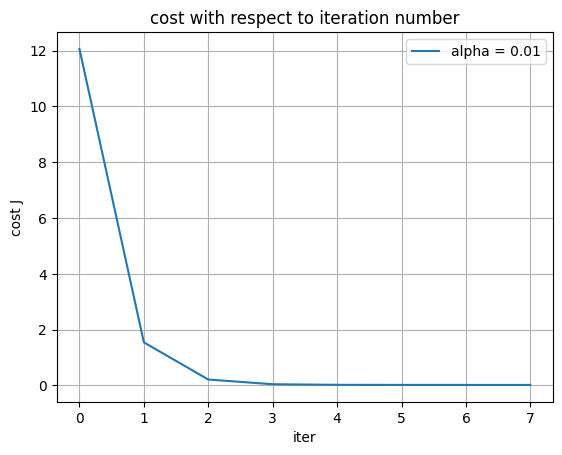

In [ ]:
# draw cost function graph
iter = len(J)
iter_list = list(range(iter))

plt.plot(iter_list, J)

## 그꾸 ^ㅁ^
# label / legend / title
plt.xlabel("iter")
plt.ylabel("cost J")
plt.legend(['alpha = 0.01'])
plt.title("cost with respect to iteration number")

# grid
plt.grid(True) # 특정 지점에서 값을 볼 수 있음.

# cost가 잘 수렴하고 있군 ~~~~~~~ :)

In [ ]:
# now for different alphas # cost 값의 변화를 확인하기 위해.
J1 = linear_gradient_descent(X, y, alpha= 10**-2)[1]
J2 = linear_gradient_descent(X, y, alpha= 3 * 10**-2)[1]
J3 = linear_gradient_descent(X, y, alpha= 10**-1)[1]

In [ ]:
# draw cost for alpha = 0.03
list_iter_J2 = list(range(len(J2)))
list_iter_J2

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36]

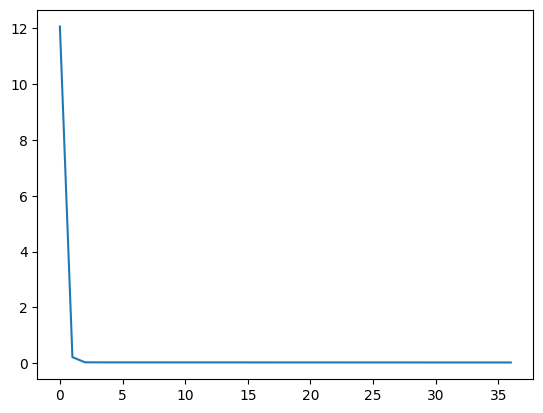

In [ ]:
# draw cost for alpha = 0.03
plt.plot(list_iter_J2, J2)
# 앞의 그래프보다 가파르다!

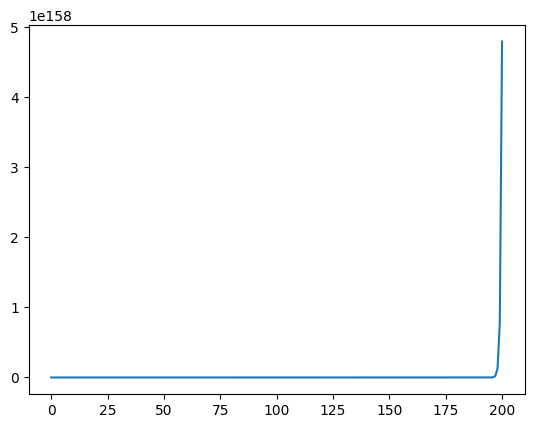

In [ ]:
# draw cost for alpha = 0.1
list_iter_J3 = list(range(len(J3)))
plt.plot(list_iter_J3, J3)
# 이건 오히려 수렴하다가 cost가 터져버린다.......... :(

In [ ]:
J

[12.063743929418541,
 1.5444216269421611,
 0.2121277177666805,
 0.04340187025628166,
 0.022033507483920755,
 0.01932251736238185,
 0.018972235483706953,
 0.018920104213165305]

### Thus, it is important to note that hyperparameter affect convergence speed. Therefore, one needs to empirically set alpha and test the convergence speed.

# 1.2 Accuracy of Linear Regression
- Hold-out Evaluation

- [머신러닝 평가 방법](https://m.blog.naver.com/guri-sh/222110413015)

In [ ]:
# back to original dataset
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
# first, shuffle data
df_shuffle = df.sample(frac=1)

In [ ]:
# now, let's train Iris-virginica
df_vir = df_shuffle[df_shuffle[4] == "Iris-virginica"]

In [ ]:
# select data X and predictor variable y
X = df_vir.iloc[:, :3]
X.insert(0, "intercept", 1)
y = df_vir.iloc[:, 3]

X = X.to_numpy()
y = y.to_numpy()

In [ ]:
n_train = round(len(X) * 0.8)

# 80 % training data and 20 % test data
x_train = X[:n_train]
y_train = y[:n_train]
x_test = X[n_train:]
y_test = y[n_train:]

In [ ]:
# linear regression training with alpha=0.01
theta_opt, cost_J = linear_gradient_descent(X, y, alpha=0.01)

In [ ]:
# error of the model
cost_linear(theta_opt, x_test, y_test)

0.044853000773781695

## 2. Implementing Logistic Regression using Gradient Descent

In [ ]:
# load data
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, header=None)

In [ ]:
# show iris dataset
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
# show unique labels
df[4].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
# get only iris-setosa and iris-versicolor
new_df = df[(df[4] == 'Iris-setosa') | (df[4] == 'Iris-versicolor')]

In [ ]:
new_df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor
97,6.2,2.9,4.3,1.3,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor


In [ ]:
# change the label to 0 and 1
new_df.replace("Iris-setosa", 0, inplace=True)
new_df.replace("Iris-versicolor", 1, inplace=True)

<ipython-input-24-ef4010dc328e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.replace("Iris-setosa", 0, inplace=True)
<ipython-input-24-ef4010dc328e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.replace("Iris-versicolor", 1, inplace=True)


In [ ]:
new_df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [ ]:
# get training data
train_df = new_df.sample(frac=0.8, random_state=23)
# sample 메서드는 DataFrame, Series에서 무작위로 몇개의 값(레이블) 출력 메서드
# frac : 출력 비율
train_df

,0,1,2,3,4
26,5.0,3.4,1.6,0.4,0
80,5.5,2.4,3.8,1.1,1
82,5.8,2.7,3.9,1.2,1
68,6.2,2.2,4.5,1.5,1
77,6.7,3.0,5.0,1.7,1
...,...,...,...,...,...
57,4.9,2.4,3.3,1.0,1
62,6.0,2.2,4.0,1.0,1
41,4.5,2.3,1.3,0.3,0
48,5.3,3.7,1.5,0.2,0


In [ ]:
# get test data
test_df = new_df.drop(train_df.index)
test_df

,0,1,2,3,4
6,4.6,3.4,1.4,0.3,0
12,4.8,3.0,1.4,0.1,0
25,5.0,3.0,1.6,0.2,0
31,5.4,3.4,1.5,0.4,0
39,5.1,3.4,1.5,0.2,0
40,5.0,3.5,1.3,0.3,0
45,4.8,3.0,1.4,0.3,0
49,5.0,3.3,1.4,0.2,0
51,6.4,3.2,4.5,1.5,1
54,6.5,2.8,4.6,1.5,1


In [ ]:
# make train_df and test_df to numpy arrays
train_df = train_df.to_numpy()
test_df = test_df.to_numpy()

In [ ]:
# data: X and predictor variable y
X = train_df[:, :4]
y = train_df[:, 4]

In [ ]:
# check X and y
print(X)
print(y)

In [ ]:
# augment X with 1's in the leftmost column
X = np.insert(X, 0, 1, axis=1)

In [ ]:
# simple sigmoid function
def sigmoid_func(z):
  '''
  z: real value
  '''
  return 1 / (1 + np.exp(-z))

In [ ]:
# test sigmoid function
print(sigmoid_func(0))
print(sigmoid_func(10.2))

0.5
0.9999628310628971


In [ ]:
# our hypothesis function
def compute_logistic_func(theta, x):
  '''
  theta: w0, w1, ..., wn
  x: 1, x1, x2, ..., xn
  '''
  z = np.dot(theta, x)
  return sigmoid_func(z)

In [ ]:
# test logistic function
test_theta = np.random.rand(5)
compute_logistic_func(test_theta, X[1])

0.996863593171586

In [ ]:
from tables.utils import dump_logged_instances
# compute gradient
def compute_jth_log_gradient(theta, j, X, y):
  '''
  theta = w0, w1, ..., wn
  j: jth feature
  X: data
  y: predictor variable
  '''
  # m: num of data
  m = len(X)

  dl_dw = 0
  for i in range(m):
    dl_dw += (y[i] - compute_logistic_func(theta, X[i])) * X[i][j]
  dl_dw = dl_dw * (1/m)

  return dl_dw


In [ ]:
# test gradient function
compute_jth_log_gradient(test_theta, 1, X, y)

-2.61281778717572

In [ ]:
def cross_entropy(theta, X, y):
  '''
  theta = w0, w1, ..., wn
  X: data
  y: predictor variable
  '''
  m = len(X)

  cross = 0
  for i in range(m):
    cross += y[i] * np.log(compute_logistic_func(theta, X[i])) + (1 - y[i]) * np.log(1 - compute_logistic_func(theta, X[i]))
  cross = cross * (1/m)

  return cross

In [ ]:
# test cross entropy function
cross_entropy(test_theta, X, y)

-2.77951909951135

In [ ]:
np.log(2.7)

0.9932517730102834

In [ ]:
# gradient descent for logistic regression
def logistic_gradient_descent(X, y, alpha):
  '''
  X: data
  y: predictor variable
  '''
  # m: number of data, n: number of features
  m = len(X)
  n = X.shape[1]

  # iteration number / cross entropy
  iter = 200
  cross = []

  # initialize theta
  np.random.seed(23)
  theta = np.random.rand(n)

  for i in range(iter):

    cross.append(cross_entropy(theta, X, y))

    for j in range(n):
      theta[j] = theta[j] + alpha * compute_jth_log_gradient(theta, j, X, y)

  return theta, cross


In [ ]:
# run logistic regression
theta, cross = logistic_gradient_descent(X, y, alpha=0.01)

Text(0.5, 1.0, 'cross entropy of logistic regression')

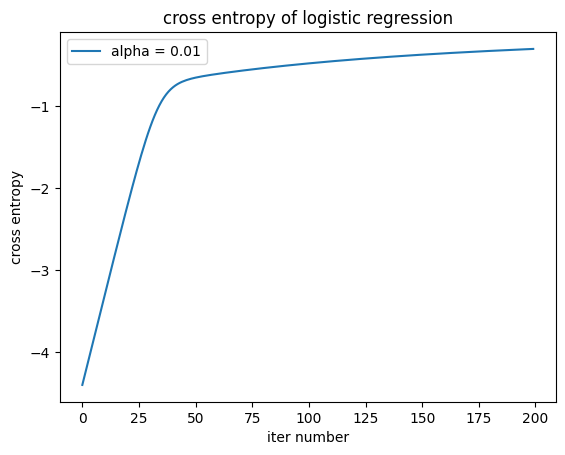

In [ ]:
# plot cross entropy
iter_list = list(range(len(cross)))

plt.plot(iter_list, cross)

# xlabel, ylabel, legend, title
plt.xlabel("iter number")
plt.ylabel("cross entropy")
plt.legend(["alpha = 0.01"])
plt.title("cross entropy of logistic regression")

Text(0.5, 1.0, 'cross entropy of logistic regression')

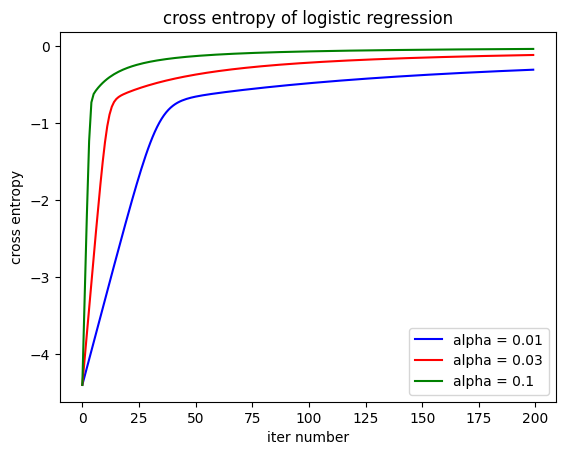

In [ ]:
# try different alpha
theta, cross = logistic_gradient_descent(X, y, alpha=0.01)
theta2, cross2 = logistic_gradient_descent(X, y, alpha=0.03)
theta3, cross3 = logistic_gradient_descent(X, y, alpha=0.1)

# plot cross entropy
iter_list = list(range(len(cross)))

plt.plot(iter_list, cross, color='b')
plt.plot(iter_list, cross2, color='r')
plt.plot(iter_list, cross3, color='g')

# xlabel, ylabel, legend, title
plt.xlabel("iter number")
plt.ylabel("cross entropy")
plt.legend(["alpha = 0.01", "alpha = 0.03", "alpha = 0.1"])
plt.title("cross entropy of logistic regression")

In [ ]:
# test data
x_test = test_df[:, :4]
x_test = np.insert(x_test, 0, 1, axis = 1)
y_test = test_df[:, 4]

In [ ]:
# show test data
print(x_test)
print(y_test)

In [ ]:
# prediction with our optimal theta
y_pred = x_test @ theta
y_pred = sigmoid_func(y_pred)

In [ ]:
# print y_pred
print(y_pred)

[0.2919193  0.29421163 0.31967935 0.27981223 0.27485296 0.25748724
 0.31215003 0.27393238 0.75961876 0.79007211 0.68993419 0.7988529
 0.73636143 0.791984   0.74599162 0.79251292 0.85762867 0.7758883
 0.79400049 0.78500627]


In [ ]:
# threshold
threshold = 0.5

# classification based on our model and the threshold
for i in range(len(y_pred)):
  if y_pred[i] >= 0.5:
    y_pred[i] = 1
  else:
    y_pred[i] = 0

In [ ]:
# print the classification result
print(y_pred)

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])